In [1]:
import sys
ga_path = '/Users/pdcos/Documents/Estudos/Mestrado/Tese/Algoritmos Evolutivos/evolutionary_algorithms/src'
sys.path.append(ga_path)
from models.pso import PSO
from models.differential_evolution import DifferentialEvolutionAlgorithm
from fitness_function import RocketFitness, bound_values, fitness_func
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [2]:
rocket_fitness = RocketFitness(bound_values)
random_values = np.random.rand(10,10)
fitness_func_class = rocket_fitness.calc_fitness


In [3]:


pso_alg = PSO(
    num_epochs=500,
    pop_size=1000,
    chrom_length=10,
    n_best=2,
    global_factor = 0.8,
    local_factor = 0.8,
    speed_factor = 0.1,
    v_max=0.2,
    value_ranges=bound_values,
    fitness_func=fitness_func_class,
    neighborhood_mode='ring',
    verbose=True,
    eval_every=10,

    )

best_solutions = pso_alg.fit()
pso_alg.plot()

  0%|          | 1/500 [00:04<35:07,  4.22s/it]

Epoch 0: Best: 0.5698882140733166, Average: 0.23985403594469068


  2%|▏         | 11/500 [00:50<38:49,  4.76s/it]

Epoch 10: Best: 0.6006889956503878, Average: 0.5014627540026118


  4%|▍         | 21/500 [01:38<38:27,  4.82s/it]

Epoch 20: Best: 0.6007999714933219, Average: 0.529532592203552


  6%|▌         | 31/500 [02:28<38:48,  4.96s/it]

Epoch 30: Best: 0.6018476096902409, Average: 0.5297255555587685


  8%|▊         | 41/500 [03:18<38:12,  4.99s/it]

Epoch 40: Best: 0.6018640220072201, Average: 0.5201641722715022


 10%|█         | 51/500 [04:08<37:13,  4.97s/it]

Epoch 50: Best: 0.6018640224249836, Average: 0.5373652233379785


 12%|█▏        | 61/500 [04:57<35:59,  4.92s/it]

Epoch 60: Best: 0.601864022425383, Average: 0.5349086591638665


 14%|█▍        | 71/500 [05:46<35:09,  4.92s/it]

Epoch 70: Best: 0.6018640224253989, Average: 0.532381545104462


 16%|█▌        | 81/500 [06:36<34:37,  4.96s/it]

Epoch 80: Best: 0.6018640224616372, Average: 0.5209269653903018


 18%|█▊        | 91/500 [07:28<36:18,  5.33s/it]

Epoch 90: Best: 0.6018640224616635, Average: 0.5297669989135342


 20%|██        | 101/500 [08:20<35:05,  5.28s/it]

Epoch 100: Best: 0.6018640224616635, Average: 0.5359071528567502


 22%|██▏       | 111/500 [09:09<31:56,  4.93s/it]

Epoch 110: Best: 0.6018640224616222, Average: 0.5117241499419051


 24%|██▍       | 121/500 [10:08<36:30,  5.78s/it]

Epoch 120: Best: 0.6018640224616791, Average: 0.5366002657926883


 25%|██▍       | 123/500 [10:22<31:47,  5.06s/it]


KeyboardInterrupt: 

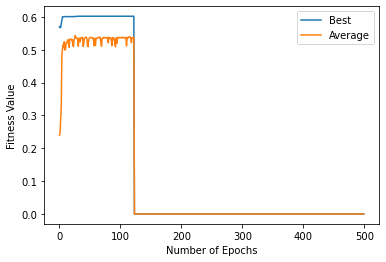

In [4]:
pso_alg.plot()

In [5]:
min_mat = bound_values.T[0, :]
max_mat = bound_values.T[1,:]
best_sol_denorm = pso_alg.gbest * (max_mat - min_mat) + min_mat
print(best_sol_denorm)

[1.19956657e+07 3.47523344e+00 2.28180932e-01 1.34409454e+02
 1.86197248e+07 4.50029858e+00 2.28571082e-01 8.38946410e+01
 1.93358383e+00 2.80614474e+00]


In [6]:
fitness_func(best_sol_denorm, verbose=True)

***** Payload Bay *****
Cone Area: 37.653733282525664 [kg]
Cylinder Area: 96.82388558363742 [kg]
Frustrum Area: 39.903738074203076 [kg]
Total Payload Fairing Mass: 1616.2504440348007 [kg]
Electronic Mass: 416.05601806493866 [kg]
Power Mass: 96.72054251955629 [kg]
Total Payload Mass: 9629.027004619296 [kg]
***** Upper Stage Engine *****
Isp Vac (s): 384.9325703105585
Isp Sea (s): (232.4328186198419, 'Separated (Psep=3.7118e+06, epsSep=110.557)')
Mass flow (kg/s): 282.2848029606543
Thrust Vac (kN): 1327.030788224653
Thrust Sea (kN): 777.3907010808159
***** Upper Stage Structure *****
Ox Tank Cylyndrical Height: 3.9540559715833923 [m]
Fuel Tank Cylyndrical Height: 0.035038260794882876 [m]
Ox Tank Volume: 76.72434931831229 [m3]
Fuel Tank Volume: 30.69306301172595 [m3]
Intertank Structure Mass: 919.4242446397869 [kg]
Separation Explosives Mass: 8.377253494018788 [kg]
Tank Fairing Mass: 632.4112994977436 [kg]
Total Stage Height: 15.884130544492663 [m]
Total Stage Dry Mass: 3121.348569563418 

0.20372804492335833

  0%|          | 1/500 [00:06<53:04,  6.38s/it]

Epoch 0: Best: 0.5698882140733166, Average: 0.23985403594469068


  2%|▏         | 11/500 [01:03<46:35,  5.72s/it]

Epoch 10: Best: 0.6006889956503878, Average: 0.5014627540026118


  4%|▍         | 21/500 [02:03<46:18,  5.80s/it]

Epoch 20: Best: 0.6007999714933219, Average: 0.529532592203552


  6%|▌         | 31/500 [02:59<43:52,  5.61s/it]

Epoch 30: Best: 0.6018476096902409, Average: 0.5297255555587685


  8%|▊         | 41/500 [03:54<42:00,  5.49s/it]

Epoch 40: Best: 0.6018640220072201, Average: 0.5201641722715022


 10%|█         | 51/500 [04:50<41:26,  5.54s/it]

Epoch 50: Best: 0.6018640224249836, Average: 0.5373652233379785


 12%|█▏        | 61/500 [05:44<39:45,  5.43s/it]

Epoch 60: Best: 0.601864022425383, Average: 0.5349086591638665


 14%|█▍        | 71/500 [06:39<39:57,  5.59s/it]

Epoch 70: Best: 0.6018640224253989, Average: 0.532381545104462


 16%|█▌        | 81/500 [07:33<38:05,  5.46s/it]

Epoch 80: Best: 0.6018640224616372, Average: 0.5209269653903018


 18%|█▊        | 91/500 [08:27<37:00,  5.43s/it]

Epoch 90: Best: 0.6018640224616635, Average: 0.5297669989135342


 20%|██        | 101/500 [09:21<35:27,  5.33s/it]

Epoch 100: Best: 0.6018640224616635, Average: 0.5359071528567502


 22%|██▏       | 111/500 [10:16<35:08,  5.42s/it]

Epoch 110: Best: 0.6018640224616222, Average: 0.5117241499419051


 24%|██▍       | 121/500 [11:10<33:47,  5.35s/it]

Epoch 120: Best: 0.6018640224616791, Average: 0.5366002657926883


 26%|██▌       | 131/500 [12:04<32:32,  5.29s/it]

Epoch 130: Best: 0.6018640224616791, Average: 0.5367983679510203


 28%|██▊       | 141/500 [12:56<31:18,  5.23s/it]

Epoch 140: Best: 0.6018640224616791, Average: 0.5357009368497608


 30%|███       | 151/500 [13:50<30:58,  5.33s/it]

Epoch 150: Best: 0.6018640224639428, Average: 0.520648598567817


 32%|███▏      | 161/500 [14:44<30:29,  5.40s/it]

Epoch 160: Best: 0.6018640224640848, Average: 0.5367730901276137


 34%|███▍      | 171/500 [15:37<29:07,  5.31s/it]

Epoch 170: Best: 0.6018640224640848, Average: 0.5359465672716796


 36%|███▌      | 181/500 [16:36<29:44,  5.60s/it]

Epoch 180: Best: 0.6018640224640848, Average: 0.537660886250691


 38%|███▊      | 191/500 [17:34<30:40,  5.96s/it]

Epoch 190: Best: 0.6018640224640848, Average: 0.5356603826725103


 40%|████      | 201/500 [18:29<26:59,  5.42s/it]

Epoch 200: Best: 0.6018640224640848, Average: 0.5336400622910069


 42%|████▏     | 211/500 [19:27<28:03,  5.82s/it]

Epoch 210: Best: 0.6018640224640848, Average: 0.5356227436516557


 44%|████▍     | 221/500 [20:22<26:04,  5.61s/it]

Epoch 220: Best: 0.6018640224640848, Average: 0.5371120150880149


 46%|████▌     | 231/500 [21:18<24:57,  5.57s/it]

Epoch 230: Best: 0.6018640224640848, Average: 0.5365637444894488


 48%|████▊     | 241/500 [22:14<23:55,  5.54s/it]

Epoch 240: Best: 0.6018640224640848, Average: 0.5118714129968227


 50%|█████     | 251/500 [23:10<23:04,  5.56s/it]

Epoch 250: Best: 0.6018640224640848, Average: 0.5359042242086436


 52%|█████▏    | 261/500 [24:06<22:20,  5.61s/it]

Epoch 260: Best: 0.6018640224640848, Average: 0.5337580216924176


 54%|█████▍    | 271/500 [25:02<21:20,  5.59s/it]

Epoch 270: Best: 0.6018640224640848, Average: 0.5364514123705127


 56%|█████▌    | 281/500 [25:58<20:19,  5.57s/it]

Epoch 280: Best: 0.6018640224640848, Average: 0.535325902438718


 58%|█████▊    | 291/500 [26:54<19:33,  5.62s/it]

Epoch 290: Best: 0.6018640224640848, Average: 0.5373250259428016


 60%|██████    | 301/500 [27:51<18:55,  5.71s/it]

Epoch 300: Best: 0.6018640224640848, Average: 0.5373380172176088


 62%|██████▏   | 311/500 [28:49<18:06,  5.75s/it]

Epoch 310: Best: 0.6018640224640848, Average: 0.5369028397008548


 64%|██████▍   | 321/500 [29:46<16:55,  5.67s/it]

Epoch 320: Best: 0.6018640224640848, Average: 0.5208944034096692


 66%|██████▌   | 331/500 [30:43<16:08,  5.73s/it]

Epoch 330: Best: 0.6018640224640848, Average: 0.5351767472759535


 68%|██████▊   | 341/500 [31:44<15:38,  5.90s/it]

Epoch 340: Best: 0.6018640224640848, Average: 0.5390034195871779


 70%|███████   | 351/500 [32:41<14:09,  5.70s/it]

Epoch 350: Best: 0.6018640224640848, Average: 0.5348070341314031


 72%|███████▏  | 361/500 [33:38<13:01,  5.62s/it]

Epoch 360: Best: 0.6018640224640848, Average: 0.5271130298854333


 74%|███████▍  | 371/500 [34:34<12:14,  5.70s/it]

Epoch 370: Best: 0.6018640224640848, Average: 0.5369104122454023


 76%|███████▌  | 381/500 [35:35<11:42,  5.90s/it]

Epoch 380: Best: 0.6018640224640848, Average: 0.5274553151728985


 78%|███████▊  | 391/500 [36:35<10:57,  6.04s/it]

Epoch 390: Best: 0.6018640224640848, Average: 0.5367649536649909


 80%|████████  | 401/500 [37:35<09:57,  6.03s/it]

Epoch 400: Best: 0.6018640224640848, Average: 0.5358429672935359


 82%|████████▏ | 411/500 [38:34<08:48,  5.94s/it]

Epoch 410: Best: 0.6018640224640848, Average: 0.5068479113943158


 84%|████████▍ | 421/500 [39:33<07:40,  5.82s/it]

Epoch 420: Best: 0.6018640224640848, Average: 0.5358878763946829


 86%|████████▌ | 431/500 [41:09<07:46,  6.76s/it]

Epoch 430: Best: 0.6018640224640848, Average: 0.5343935557099428


 88%|████████▊ | 441/500 [43:57<29:54, 30.41s/it]

Epoch 440: Best: 0.6018640224640848, Average: 0.5360294146682358


 90%|█████████ | 451/500 [46:45<34:38, 42.41s/it]

Epoch 450: Best: 0.6018640224640848, Average: 0.5370341266000636


 92%|█████████▏| 461/500 [47:32<03:40,  5.65s/it]

Epoch 460: Best: 0.6018640224640848, Average: 0.5298918921826008


 94%|█████████▍| 471/500 [48:19<02:18,  4.76s/it]

Epoch 470: Best: 0.6018640224640848, Average: 0.5373732924580277


 96%|█████████▌| 481/500 [49:06<01:31,  4.81s/it]

Epoch 480: Best: 0.6018640224640848, Average: 0.5312424622747803


 98%|█████████▊| 491/500 [49:56<00:46,  5.18s/it]

Epoch 490: Best: 0.6018640224640848, Average: 0.5395748159206638


100%|██████████| 500/500 [50:42<00:00,  6.08s/it]


--- 3049.1724739074707 seconds ---


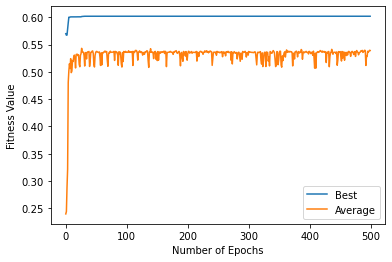

In [9]:
pso_alg = PSO(
    num_epochs=500,
    pop_size=1000,
    chrom_length=10,
    n_best=2,
    global_factor = 0.8,
    local_factor = 0.8,
    speed_factor = 0.1,
    v_max=0.2,
    value_ranges=bound_values,
    fitness_func=fitness_func_class,
    neighborhood_mode='self',
    verbose=True,
    eval_every=10,

    )

best_solutions = pso_alg.fit()
pso_alg.plot()

In [10]:
min_mat = bound_values.T[0, :]
max_mat = bound_values.T[1,:]
best_sol_denorm = pso_alg.gbest * (max_mat - min_mat) + min_mat
print(best_sol_denorm)

[1.19956657e+07 3.47523344e+00 2.28180932e-01 1.34409454e+02
 1.86197248e+07 4.50029858e+00 2.28571082e-01 8.38946410e+01
 1.93358383e+00 2.80614474e+00]


In [11]:
fitness_func(best_sol_denorm, verbose=True)

***** Payload Bay *****
Cone Area: 37.653733282525664 [kg]
Cylinder Area: 96.82388558363742 [kg]
Frustrum Area: 39.903738074429874 [kg]
Total Payload Fairing Mass: 1616.250444037045 [kg]
Electronic Mass: 416.05601806545644 [kg]
Power Mass: 96.72054251967666 [kg]
Total Payload Mass: 9629.027004622178 [kg]
***** Upper Stage Engine *****
Isp Vac (s): 384.9325703105762
Isp Sea (s): (232.43281861986213, 'Separated (Psep=3.7118e+06, epsSep=110.557)')
Mass flow (kg/s): 282.2848029225034
Thrust Vac (kN): 1327.0307880447185
Thrust Sea (kN): 777.3907009742269
***** Upper Stage Structure *****
Ox Tank Cylyndrical Height: 3.9540559713059995 [m]
Fuel Tank Cylyndrical Height: 0.03503826053709783 [m]
Ox Tank Volume: 76.72434931781669 [m3]
Fuel Tank Volume: 30.69306301007641 [m3]
Intertank Structure Mass: 919.424244671583 [kg]
Separation Explosives Mass: 8.377253494021295 [kg]
Tank Fairing Mass: 632.4112994721404 [kg]
Total Stage Height: 15.884130544073779 [m]
Total Stage Dry Mass: 3121.3485694658207 

0.20372804492816965